# EDA

Data Source: https://competition.nishika.com/competitions/hate/data

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import spacy
from collections import Counter
from tqdm.auto import tqdm

In [3]:
!ls tmp/data

README.txt            sample_submission.csv train.csv
data_explanation.xlsx test.csv


In [5]:
df = pd.read_csv('tmp/data/train.csv')
df.shape

(5256, 4)

In [6]:
df

,id,source,text,label
0,80074aa43,news4vip,まともに相手されてない人との関係なんて\nそんな大事にするものか？,0
1,6378fea6b,livejupiter,最近はアヘアヘQSマンやない？ ｲｲ!(・∀・)+1-0(・Ａ・)ｲｸﾅｲ!,0
2,c535f5613,livejupiter,日本人として生まれても無能な低学歴って分かったら日本人の権利剥奪して追放すべきやろ\n甘えるな,1
3,e76638295,livejupiter,よくよく思えば川上は配布にしたらとんでもなく有能だよな\nガチャから引いたら圧倒的歓喜レベルやで,0
4,51e4036bf,newsplus,押井は原作レイプの専門家だから\n原作マンガの真意を誤解させることに関してはプロだが\nそれ...,0
...,...,...,...,...
5251,42b5f86b0,news4vip,車じゃなくてもよくない？\nケーブル網を張り巡らせてリフトみたいなのを付けるとか,0
5252,402ce15d9,livejupiter,左やぞ？\n出すなら下水流,0
5253,0739a9fcb,newsplus,日本によって、けんけんガクガクの議論を持たらされた韓国は被害者\n\n日本人がしっかり考えな...,0
5254,d496c7dc8,news4vip,ゴムボート買って、沖まで漕いで行ったら？\n魚の血を塗っておけばサメが食べてくれるよ,0


### labelの分布

In [7]:
df['label'].value_counts()

label
0    4950
1     306
Name: count, dtype: int64

In [8]:
df['label'].value_counts(normalize=True)

label
0    0.941781
1    0.058219
Name: proportion, dtype: float64

0: ヘイトスピーチではない  
1: ヘイトスピーチ

### 文章の例

In [31]:
print('>>>>> ヘイトスピーチの例（label=1） <<<<<')
print('')
for t in df[df['label']==1].sample(15)['text']:
    print(t)
    print('----------')

>>>>> ヘイトスピーチの例（label=1） <<<<<

後で見返りよ要求したに決まってる
朝鮮人とはそういう奴等
世界一民度が低くて詐欺師と強姦魔しかいない
----------
日本人は狭くて労働環境最悪でブサイクの癖に整形しない陰湿劣等民族やからやで
----------
そっち？
やっぱり朝鮮人が得意とする自作自演なのかw
満員電車でキムチのつまみ食いとかwww
----------
外国人のまんこは排斥せなあかんやろ
ハーフのまんこもアウト
----------
消去法ならどう考えてもこのババアはないだろ！
どんな選択法してんだアホ都民は
----------
それな
つまり、日本のテロリストは民主党支持者ってこったな
過激派の首謀者は、在日なんだよね
----------
日本にアイヌと蝦夷と熊襲と琉球の混じった人間はいらない
----------
半島は「国交断絶」でどうにでもなるが、在日は国内に潜伏だからねぇ。
これが一番の日本の癌なのは間違いない。
----------
法案の中身も読めないとは、朝鮮人哀れwww
朝鮮学校ではまともな教育受けられないんだなw
----------
発狂はお前らのお得意分野だろ
韓国さんよ
----------
人に大怪我させた飼い犬や狂犬病のおそれがある野良犬は刹処分に決まってんだろ
犬の話を人間にすり替えるとか、お前ブサヨかよｗ
ちなみに朝鮮ジンは人とことなるから野生動物扱いでかまわんやろｗ
----------
日本人は「同じレベルの墜ちてはいけない(戒め)」って言いすぎた結果、今のシナチョンの増長を招いたんやで
これからはチョンが犬食い民族・糞食い民族・近親相姦民族である事を世界中にばらまかないと(アカン)
----------
増えたら増えたで朝鮮人の危険性が知れわたるからそれでええんやで
あとでゆっくり排斥すれば
----------
政治家と老害と寄生虫ナマポ外国人抹殺せなアカンな
----------
頭おかしくて結構
朝鮮人とakbは消えてくれ
----------


In [32]:
print('>>>>> ヘイトスピーチでない例（label=0） <<<<<')
print('')
for t in df[df['label']==0].sample(15)['text']:
    print(t)
    print('----------')

>>>>> ヘイトスピーチでない例（label=0） <<<<<

なんか軍駐留させてたら勝手に戦争はじまって米英が敵支援するから終わらなくなった
----------
嘘ついて仲良くなれたとしても果たしてそれは本当の関係になれるのだろうか
----------
はやいとこジョブチェンジするのをオススメするよ。ダーマ神殿へ行くべき
----------
レカスはそんな状態でもへーきでスナイプするプロやで
これがプロと高校未満違いや(適当)
----------
テラス作るべきかな？その前に投手事情なんとかしないと打たれる数増えそう
----------
人は一生、暗やみと、悲しみと、多くの悩みと、病と、憤りの中にある
----------
1級は月10万貰えんのか羨ましい
バイトするより儲かるやん
----------
昆虫食を食わせたい。
ほんの軽いところからでいい。食用の着色料でコチニール色素ってあるじゃん？あれカイガラムシだからｗ
----------
それでも自分の編集残しておきたければ、
編集した根拠となるソース（URL)を貼っておけばいいんじゃない感。
----------
無関係な地方から見れば、大阪独特の気質が革新右派に利用されてる様にしか見えんのだけどね…
----------
金誰が出すの？ｗ
新幹線（）も酷かったね
はっきり言えるのは中国は嘘吐きだし借金してるしであてにならない国ってことよ
----------
誰に聞いたか知らんが、Ｃ＃は開発言語としてはトップクラスに分かりやすい部類やぞ
----------
だから、そういうのはどんどん逮捕しろって。
早く治安維持法を復活させろ。
----------
一番好きなネタは真ん中らへんで頼むかなあ
最初からはいきたくないけど、最後やとお腹一杯になるのが心配やし
----------
それは、怖いわ。
それから後ろ向いたか？
----------


### （ヘイトスピーチにおける）頻出単語

In [68]:
ginza_nlp = spacy.load("ja_ginza")
counter = Counter()

for text in tqdm(df[df["label"]==1]["text"]):     # ヘイトスピーチのテキストにおいて
    # 名詞かつ文字数が2以上の単語のみカウント
    counter.update([str(t) for t in ginza_nlp(text) if (t.pos_ == "NOUN") & (len(t) > 1)])

  0%|          | 0/306 [00:00<?, ?it/s]

In [71]:
counter.most_common(n=30)

[('日本人', 55),
 ('朝鮮人', 52),
 ('在日', 43),
 ('こと', 27),
 ('\n\n', 22),
 ('民族', 20),
 ('韓国人', 14),
 ('劣等', 12),
 ('もの', 11),
 ('価値', 9),
 ('社会', 9),
 ('差別', 9),
 ('ホモ', 9),
 ('人間', 8),
 ('土人', 8),
 ('障害者', 8),
 ('ため', 8),
 ('ども', 7),
 ('移民', 7),
 ('本当', 7),
 ('\r\n', 7),
 ('国家', 7),
 ('もん', 7),
 ('仕事', 6),
 ('事件', 6),
 ('クソ', 6),
 ('外国人', 6),
 ('やつ', 6),
 ('意味', 6),
 ('子供', 6)]

### 文章の長さ

In [53]:
# 文章の文字数
length = df["text"].str.len()

pd.Series(length).describe(percentiles=[0.05, 0.1, 0.2, 0.8, 0.9, 0.95])

count    5256.000000
mean       47.627093
std        22.732763
min         5.000000
5%         16.000000
10%        22.000000
20%        31.000000
50%        43.000000
80%        65.000000
90%        79.000000
95%        93.000000
max       137.000000
Name: text, dtype: float64

[]

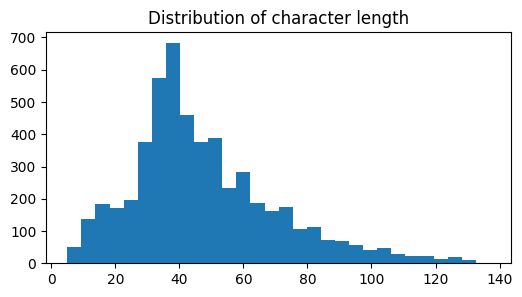

In [54]:
plt.figure(figsize=(6, 3))
plt.hist(length, bins=30)
plt.title('Distribution of character length')
plt.plot()

### sourceカラム

In [55]:
df['source'].value_counts()

source
newsplus       1967
news4vip       1849
livejupiter    1440
Name: count, dtype: int64

In [58]:
pd.crosstab(df['source'], df['label'], margins=True)

label,0,1,All
source,,,
livejupiter,1356,84,1440
news4vip,1712,137,1849
newsplus,1882,85,1967
All,4950,306,5256


In [60]:
pd.crosstab(df['source'], df['label'], margins=True, normalize='index')

label,0,1
source,,
livejupiter,0.941667,0.058333
news4vip,0.925906,0.074094
newsplus,0.956787,0.043213
All,0.941781,0.058219
